C:\Users\rashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0094
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.4932e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.4215e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8412e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3290e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.5619e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.4563e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 5.1244e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.6223e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.4573e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.4912e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5190e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5594e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.2599e-04
Epoch 15/20
38/38 ━

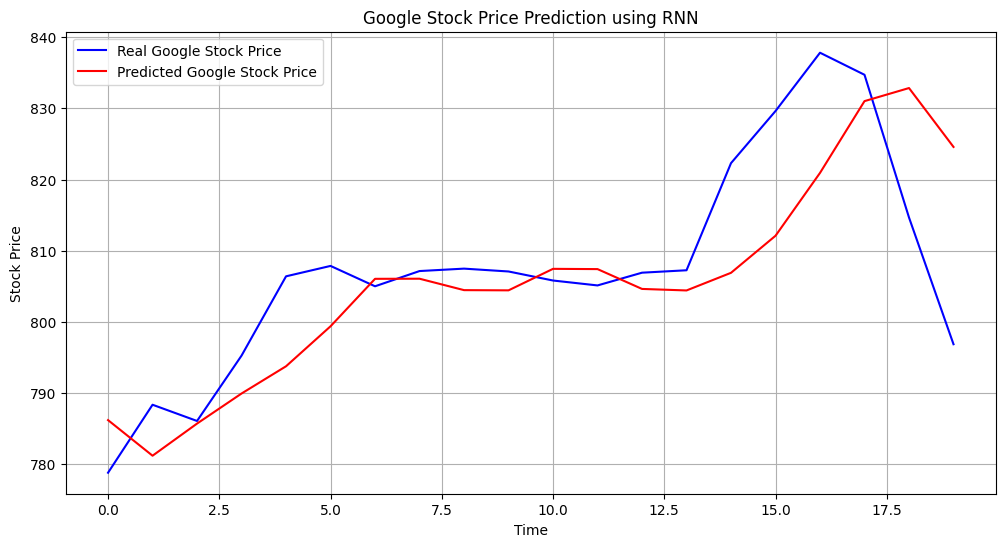

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Load and clean training data
df_train = pd.read_csv(r'C:\Users\rashi\OneDrive\Desktop\DL_practicle\GoogleTsockPricesDataset\Google_Stock_Price_Train.csv')
# Convert 'Open' to float if it's a string with commas
if df_train['Open'].dtype == 'object':
    df_train['Open'] = df_train['Open'].str.replace(',', '').astype(float)

# Step 2: Scale training data
training_set = df_train['Open'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

# Step 3: Create sequences for RNN
X_train, y_train = [], []
time_step = 60
for i in range(time_step, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-time_step:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Step 4: Build and train the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 5: Load and clean test data
df_test = pd.read_csv(r'C:\Users\rashi\OneDrive\Desktop\DL_practicle\GoogleTsockPricesDataset\Google_Stock_Price_Test.csv')
if df_test['Open'].dtype == 'object':
    df_test['Open'] = df_test['Open'].str.replace(',', '').astype(float)
real_stock_price = df_test['Open'].values.reshape(-1, 1)

# Step 6: Prepare test input
total_data = pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs = total_data[len(total_data) - len(df_test) - time_step:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

X_test = []
for i in range(time_step, len(inputs_scaled)):
    X_test.append(inputs_scaled[i-time_step:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 7: Predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Step 8: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
